In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [2]:
dataset = load_dataset("lukebarousse/data_jobs")
df = pd.DataFrame(dataset['train'])

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [22]:
df_DAUS_LOC = df_DA_US['job_location'].value_counts().nlargest(10).sort_values(ascending=False)

df_DAUS_LOC = df_DAUS_LOC.to_frame()

Text(0, 0.5, '')

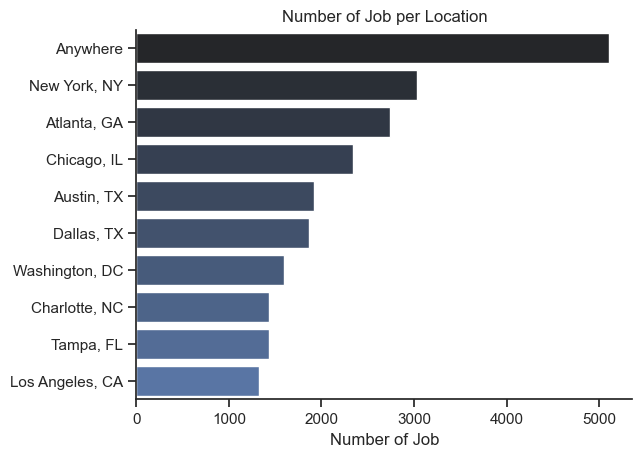

In [28]:
sns.set_theme(style = 'ticks')
sns.barplot(data = df_DAUS_LOC, x = 'count', y = 'job_location', hue  = 'job_location', palette = 'dark:b')
sns.despine()
plt.title('Number of Job per Location')
plt.xlabel('Number of Job')
plt.ylabel('')

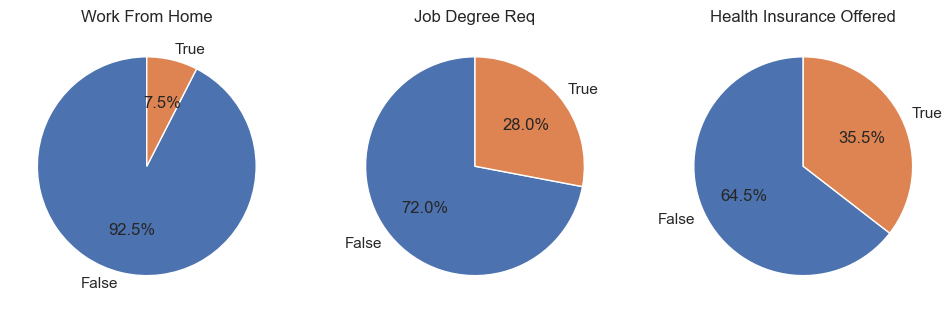

In [30]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (col_name, title) in enumerate(dict_columns.items()):
    df_DA_US[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax[i])
    ax[i].set_title(title)
    ax[i].set_ylabel('')
    ax[i].legend().remove()

Text(0, 0.5, '')

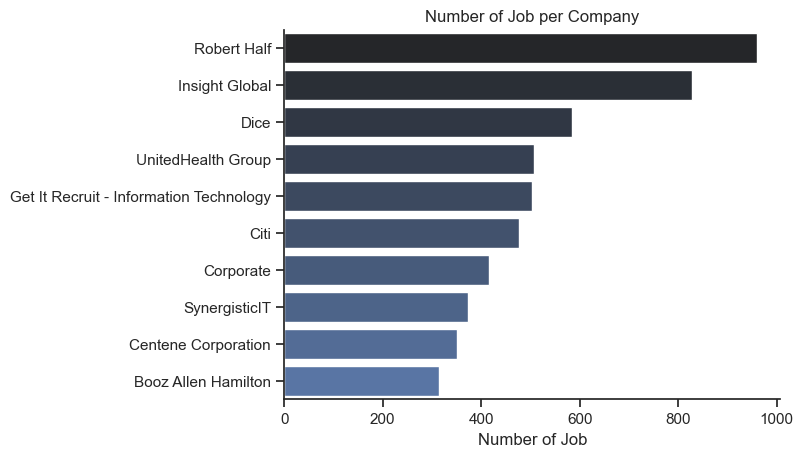

In [32]:
df_DAUS_Company = df_DA_US['company_name'].value_counts().nlargest(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_DAUS_Company, x = 'count', y = 'company_name', hue  = 'company_name', palette = 'dark:b')
sns.despine()
plt.title('Number of Job per Company')
plt.xlabel('Number of Job')
plt.ylabel('')